In [3]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
mnst = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnst.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


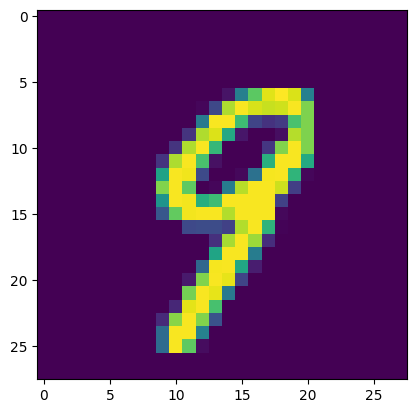

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[319])

In [6]:
y_train[319]

9

In [7]:
model = keras.Sequential([
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(256,activation = 'relu'),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])


In [8]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [9]:
history = model.fit(x_train,y_train,validation_split=.1,epochs = 25)

Epoch 1/25
1688/1688 [==============================] - 15s 8ms/step - loss: 0.2199 - accuracy: 0.9347 - val_loss: 0.0888 - val_accuracy: 0.9743
Epoch 2/25
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0886 - accuracy: 0.9722 - val_loss: 0.0822 - val_accuracy: 0.9765
Epoch 3/25
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0603 - accuracy: 0.9805 - val_loss: 0.0852 - val_accuracy: 0.9753
Epoch 4/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0456 - accuracy: 0.9853 - val_loss: 0.0681 - val_accuracy: 0.9807
Epoch 5/25
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0336 - accuracy: 0.9890 - val_loss: 0.0834 - val_accuracy: 0.9775
Epoch 6/25
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0294 - accuracy: 0.9899 - val_loss: 0.0738 - val_accuracy: 0.9817
Epoch 7/25
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0241 - accuracy: 0.9917 - val_loss: 0.0744 - val_accu

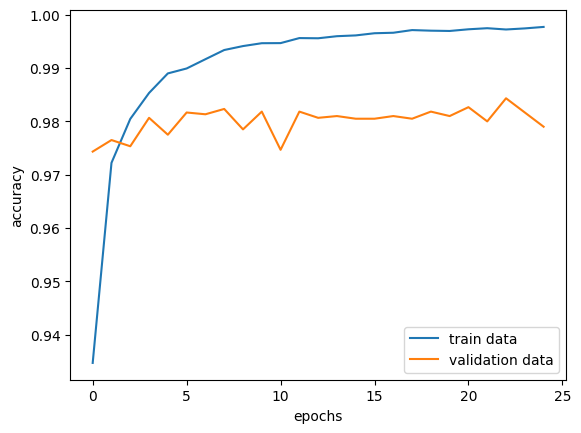

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train data','validation data'],loc = 'lower right')

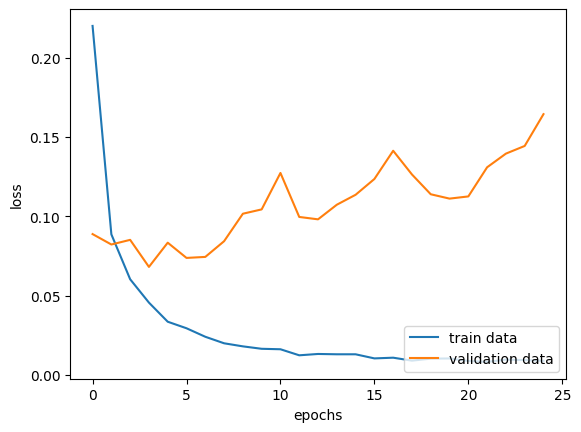

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train data','validation data'],loc = 'lower right')

In [13]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = 1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.979

Text(0.5, 0, 'Y_pred9 ,Y_test9')

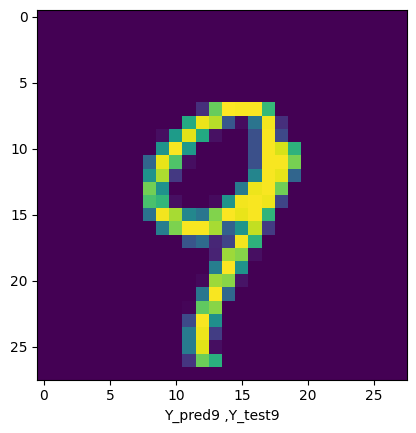

In [28]:
img = x_test[560]
plt.imshow(img)
plt.xlabel(f"Y_pred{y_pred[560]} ,Y_test{y_test[560]}")

In [22]:
y_pred[y_pred[560]] == y_test[y_test[560]]

True